# Panel Data Analysis

In [40]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS, RandomEffects, PooledOLS

## First example

In [4]:
from linearmodels.datasets import wage_panel #import panel data

data = wage_panel.load()
year = pd.Categorical(data.year)
data = data.set_index(["nr", "year"])
data["year"] = year
print(wage_panel.DESCR)
print(data.head(20))


F. Vella and M. Verbeek (1998), "Whose Wages Do Unions Raise? A Dynamic Model
of Unionism and Wage Rate Determination for Young Men," Journal of Applied
Econometrics 13, 163-183.

nr                       person identifier
year                     1980 to 1987
black                    =1 if black
exper                    labor market experience
hisp                     =1 if Hispanic
hours                    annual hours worked
married                  =1 if married
educ                     years of schooling
union                    =1 if in union
lwage                    log(wage)
expersq                  exper^2
occupation               Occupation code

         black  exper  hisp  hours  married  educ  union     lwage  expersq  \
nr year                                                                       
13 1980      0      1     0   2672        0    14      0  1.197540        1   
   1981      0      2     0   2320        0    14      1  1.853060        4   
   1982      0    

In [5]:
data

black  exper  hisp  hours  married  educ  union     lwage  \
nr    year                                                              
13    1980      0      1     0   2672        0    14      0  1.197540   
      1981      0      2     0   2320        0    14      1  1.853060   
      1982      0      3     0   2940        0    14      0  1.344462   
      1983      0      4     0   2960        0    14      0  1.433213   
      1984      0      5     0   3071        0    14      0  1.568125   
...           ...    ...   ...    ...      ...   ...    ...       ...   
12548 1983      0      8     0   2080        1     9      0  1.591879   
      1984      0      9     0   2080        1     9      1  1.212543   
      1985      0     10     0   2080        1     9      0  1.765962   
      1986      0     11     0   2080        1     9      1  1.745894   
      1987      0     12     0   3380        1     9      1  1.466543   

            expersq  occupation  year  
nr    year                             
13    1980        1           9  1980  
      1981        4           9  1981  
      1982        9           9  1982  
      1983       16           9  1983  
      1984       25           5  1984  
...             ...         ...   ...  
12548 1983       64           5  1983  
      1984       81           5  1984  
      1985      100           5  1985  
      1986      121           5  1986  
      1987      144           5  1987  

[4360 rows x 11 columns]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4360 entries, (13, 1980) to (12548, 1987)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   black       4360 non-null   int64   
 1   exper       4360 non-null   int64   
 2   hisp        4360 non-null   int64   
 3   hours       4360 non-null   int64   
 4   married     4360 non-null   int64   
 5   educ        4360 non-null   int64   
 6   union       4360 non-null   int64   
 7   lwage       4360 non-null   float64 
 8   expersq     4360 non-null   int64   
 9   occupation  4360 non-null   int64   
 10  year        4360 non-null   category
dtypes: category(1), float64(1), int64(9)
memory usage: 378.9 KB


### Dependent variable

In [44]:
data['lwage'].describe()

count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: lwage, dtype: float64

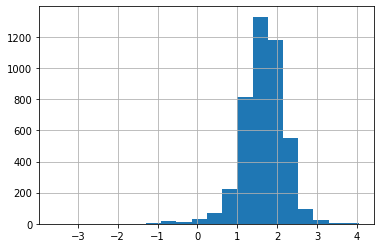

In [45]:
data['lwage'].hist(bins=20)

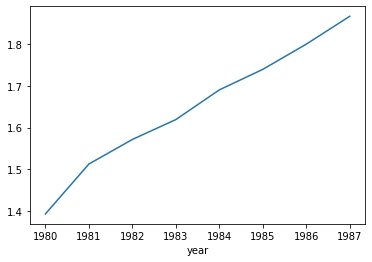

In [46]:
data['lwage'].groupby('year').mean().plot()

### Independent variables

In [47]:
data['year'].value_counts()

1980    545
1981    545
1982    545
1983    545
1984    545
1985    545
1986    545
1987    545
Name: year, dtype: int64

In [48]:
data['black'].value_counts()

0    3856
1     504
Name: black, dtype: int64

In [49]:
data['exper'].describe()

count    4360.000000
mean        6.514679
std         2.825873
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: exper, dtype: float64

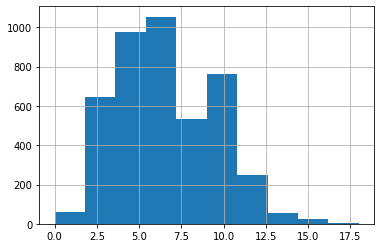

In [50]:
data['exper'].hist(bins=10)

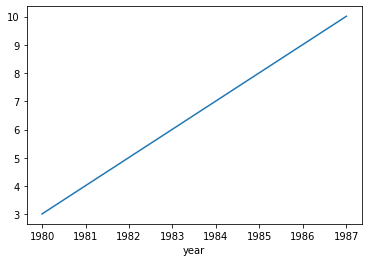

In [51]:
data['exper'].groupby('year').mean().plot()

In [52]:
data['expersq'].describe()

count    4360.000000
mean       50.424771
std        40.781991
min         0.000000
25%        16.000000
50%        36.000000
75%        81.000000
max       324.000000
Name: expersq, dtype: float64

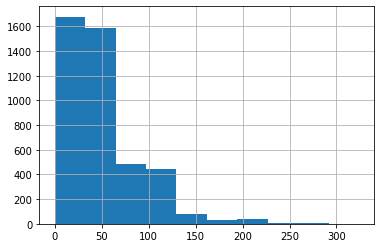

In [53]:
data['expersq'].hist(bins=10)

In [54]:
data['hisp'].value_counts()                     

0    3680
1     680
Name: hisp, dtype: int64

In [55]:
data['hours'].describe()

count    4360.000000
mean     2191.257339
std       566.352301
min       120.000000
25%      2040.000000
50%      2080.000000
75%      2414.250000
max      4992.000000
Name: hours, dtype: float64

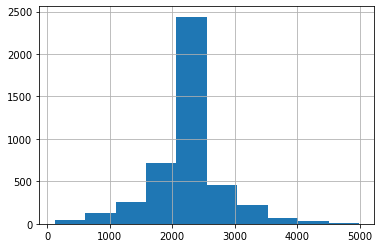

In [56]:
data['hours'].hist(bins=10)

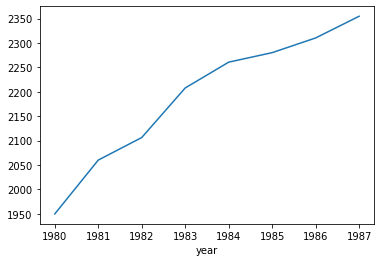

In [57]:
data['hours'].groupby('year').mean().plot()

In [58]:
data['married'].value_counts()

0    2446
1    1914
Name: married, dtype: int64

In [59]:
data['educ'].describe()

count    4360.000000
mean       11.766972
std         1.746181
min         3.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        16.000000
Name: educ, dtype: float64

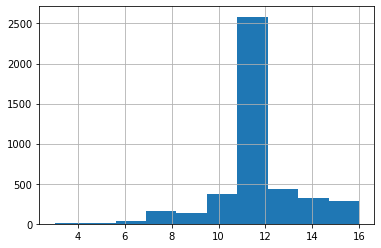

In [60]:
data['educ'].hist()

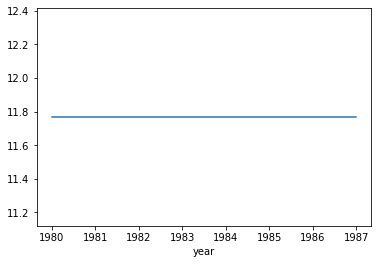

In [61]:
data['educ'].groupby('year').mean().plot()

In [62]:
data['union'].value_counts()

0    3296
1    1064
Name: union, dtype: int64

In [63]:
data['occupation'].value_counts()

5    934
6    881
9    509
4    486
1    453
7    401
2    399
3    233
8     64
Name: occupation, dtype: int64

## Pooled model
It's a simple regression model that understands various panel data structures. It is useful as a base model. It ignores time and individual characteristics and focuses only on dependencies between the individuums.  Here the log wage is modeled using all of the variables and time dummies.

In [64]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

exog_vars = ["black", "hisp", "exper", "expersq", "married", "educ", "union", "year"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.lwage, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.1893
Estimator:                  PooledOLS   R-squared (Between):              0.2066
No. Observations:                4360   R-squared (Within):               0.1692
Date:                Tue, May 03 2022   R-squared (Overall):              0.1893
Time:                        23:05:34   Log-likelihood                   -2982.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      72.459
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(14,4345)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             72.459
                            

### Different R-squared:

The definition of each value is below:

    •	Within R-squared: How much of the variation in the dependent variable within units of analysis is captured by the model (i.e., how well do your explanatory variables account for changes in dependent variable within each of the unit over time).
    •	Between R-squared: How much of the variation in the dependent variable between units of analysis is captured by the model (i.e., how well do your explanatory variables account for differences in dependent variable between units of analysis).
    •	Overall: weighted average of the two.

All these values provide some insight into the model, so you may need to report all three.

When the outcome variable is log transformed, it is natural to interpret the exponentiated regression coefficients.  These values correspond to changes in the ratio of the expected geometric means of the original outcome variable.

Please note that the dependent variable is log-transformed. We can interpret a regression coefficient as the expected change in log of wage with respect to a one-unit increase in  holding all other variables at any fixed value. But what if we want to know what happens to the outcome variable  itself (wage) for a one-unit increase in x1? The natural way to do this is to interpret the exponentiated regression coefficients exp(b), since exponentiation is the inverse of logarithm function.

In [65]:
coefs = pd.DataFrame()
coefs['Coefs'] = pooled_res.params[1:]
coefs['Features'] = pooled_res.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', pooled_res.params[0])
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

Intercept =  0.09205581068211846


,Coefs,OddsRatio
Features,,
black,-0.139234,0.870024
hisp,0.016020,1.016149
exper,0.067235,1.069546
expersq,-0.002412,0.997591
married,0.108253,1.114330
educ,0.091350,1.095652
union,0.182461,1.200168
year.1981,0.058320,1.060054
year.1982,0.062774,1.064787


In [66]:
#coefficient for 'married' predictor    
np.exp(0.1083)

1.1143820098472457

Coefficient for 'married' predictor is 0.1083. In terms of percent change, we can say that switching from single emplyees to married employees, we expect to see about 11% increase in the geometric mean of salary. In other words the wage will be 11% higher for married employees than for no-married employees.

In [67]:
#coefficient for 'educ' predictor   
np.exp(0.0913)

1.0955976352520773

Coefficient for 'educ' predictor is 0.0913.  We can say that for a one-unit increase in 'educ', we expect to see about a 9,5% increase in salary.

## Fixed effect model

In [68]:
from linearmodels.panel import PanelOLS

exog_vars = ["expersq", "union", "married", "year"]
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lwage, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1806
Estimator:                   PanelOLS   R-squared (Between):             -0.0052
No. Observations:                4360   R-squared (Within):               0.1806
Date:                Tue, May 03 2022   R-squared (Overall):              0.0807
Time:                        23:05:41   Log-likelihood                   -1324.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      83.851
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(10,3805)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             83.851
                            

## Random effect model

In [69]:
from linearmodels.panel import RandomEffects

mod = RandomEffects(data.lwage, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1643
Estimator:              RandomEffects   R-squared (Between):              0.0564
No. Observations:                4360   R-squared (Within):               0.1780
Date:                Tue, May 03 2022   R-squared (Overall):              0.1127
Time:                        23:05:44   Log-likelihood                   -1629.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      85.492
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(10,4349)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             85.492
                            

## Selection of a Panel Data Model

### Random Effects versus OLS

Breusch-Pagan test for random effects versus OLS

In [70]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res.resids #сохраняем остатки
pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1) #add the resisduals to the original dataset
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 0.0003186473908460138


H0: no individual effects (test significance greater than 0.05)

H0 is rejectes as p-value<0.05 => there are individual effects => we should select a model with effects (fixed or random).

## Fixed versus Random Effects

Hausman test for fixed versus random effects model

In [71]:
import numpy.linalg as la
from scipy import stats
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('p-value: ' + str(hausman_results[2]))

p-value: 0.0001413913491126688


H0: individual effects and regressors are not correlated (they are random)

H0 is rejected as p-value < 0.05 => individual effects and regressors are correlated  => we select fixed-effects model

## Second example

PSID wage data 1976-82 from Baltagi and Khanti-Akom (1990)


    exp            years of full-time work experience
    wks            weeks worked
    occ            occupation; occ==1 if in a blue-collar occupation
    ind            industry; ind==1 if working in a manufacturing industry
    south          residence; south==1 if in the South area
    smsa           smsa==1 if in the Standard metropolitan statistical area
    ms             marital status
    fem            female or male
    union          if wage set be a union contract
    ed             years of education
    blk            black
    lwage          log wage
    id                             
    t                              
    tdum1          t== 1.0000
    tdum2          t== 2.0000
    tdum3          t== 3.0000
    tdum4          t== 4.0000
    tdum5          t== 5.0000
    tdum6          t== 6.0000
    tdum7          t== 7.0000
    exp2                        



In [32]:
df = pd.read_excel('panel_wage.xlsx')
df

,exp,wks,occ,ind,south,smsa,ms,fem,union,ed,...,id,t,tdum1,tdum2,tdum3,tdum4,tdum5,tdum6,tdum7,exp2
0,3,32,0,0,1,0,1,0,0,9,...,1,1,1,0,0,0,0,0,0,9
1,4,43,0,0,1,0,1,0,0,9,...,1,2,0,1,0,0,0,0,0,16
2,5,40,0,0,1,0,1,0,0,9,...,1,3,0,0,1,0,0,0,0,25
3,6,39,0,0,1,0,1,0,0,9,...,1,4,0,0,0,1,0,0,0,36
4,7,42,0,1,1,0,1,0,0,9,...,1,5,0,0,0,0,1,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,3,50,0,0,0,1,0,1,0,12,...,595,3,0,0,1,0,0,0,0,9
4161,4,49,0,0,0,1,0,1,0,12,...,595,4,0,0,0,1,0,0,0,16
4162,5,50,0,0,0,1,0,1,0,12,...,595,5,0,0,0,0,1,0,0,25
4163,6,50,0,0,0,1,0,1,0,12,...,595,6,0,0,0,0,0,1,0,36


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     4165 non-null   int64  
 1   wks     4165 non-null   int64  
 2   occ     4165 non-null   int64  
 3   ind     4165 non-null   int64  
 4   south   4165 non-null   int64  
 5   smsa    4165 non-null   int64  
 6   ms      4165 non-null   int64  
 7   fem     4165 non-null   int64  
 8   union   4165 non-null   int64  
 9   ed      4165 non-null   int64  
 10  blk     4165 non-null   int64  
 11  lwage   4165 non-null   float64
 12  id      4165 non-null   int64  
 13  t       4165 non-null   int64  
 14  tdum1   4165 non-null   int64  
 15  tdum2   4165 non-null   int64  
 16  tdum3   4165 non-null   int64  
 17  tdum4   4165 non-null   int64  
 18  tdum5   4165 non-null   int64  
 19  tdum6   4165 non-null   int64  
 20  tdum7   4165 non-null   int64  
 21  exp2    4165 non-null   int64  
dtype

In [34]:
df['wage'] = pow(10, df['lwage']) #transform wage into the original scale

In [35]:
df['wage']=df['wage']/1000 #convert from dollars to thousands of dollars

In [36]:
df['wage'].describe()

count      4165.000000
mean       8536.673261
std       14854.926561
min          40.287449
25%        2484.619316
50%        4837.376495
75%        8968.714075
max      344349.694840
Name: wage, dtype: float64

In [37]:
df = df.set_index(["id", "t"]) #create a two-level index
df.head(25)

exp  wks  occ  ind  south  smsa  ms  fem  union  ed  ...    lwage  \
id t                                                       ...            
1  1    3   32    0    0      1     0   1    0      0   9  ...  5.56068   
   2    4   43    0    0      1     0   1    0      0   9  ...  5.72031   
   3    5   40    0    0      1     0   1    0      0   9  ...  5.99645   
   4    6   39    0    0      1     0   1    0      0   9  ...  5.99645   
   5    7   42    0    1      1     0   1    0      0   9  ...  6.06146   
   6    8   35    0    1      1     0   1    0      0   9  ...  6.17379   
   7    9   32    0    1      1     0   1    0      0   9  ...  6.24417   
2  1   30   34    1    0      0     0   1    0      0  11  ...  6.16331   
   2   31   27    1    0      0     0   1    0      0  11  ...  6.21461   
   3   32   33    1    1      0     0   1    0      1  11  ...  6.26340   
   4   33   30    1    1      0     0   1    0      0  11  ...  6.54391   
   5   34   30    1    1      0     0   1    0      0  11  ...  6.69703   
   6   35   37    1    1      0     0   1    0      0  11  ...  6.79122   
   7   36   30    1    1      0     0   1    0      0  11  ...  6.81564   
3  1    6   50    1    1      0     0   1    0      1  12  ...  5.65249   
   2    7   51    1    1      0     0   1    0      1  12  ...  6.43615   
   3    8   50    1    1      0     0   1    0      1  12  ...  6.54822   
   4    9   52    1    1      0     0   1    0      1  12  ...  6.60259   
   5   10   52    1    1      0     0   1    0      1  12  ...  6.69580   
   6   11   52    1    1      0     0   0    0      1  12  ...  6.77878   
   7   12   46    1    1      0     0   0    0      1  12  ...  6.86066   
4  1   31   52    1    0      0     1   0    1      0  10  ...  6.15698   
   2   32   46    1    0      0     1   0    1      0  10  ...  6.23832   
   3   33   46    1    0      0     1   0    1      0  10  ...  6.30079   
   4   34   49    1    0      0     1   0    1      0  10  ...  6.35957   

      tdum1  tdum2  tdum3  tdum4  tdum5  tdum6  tdum7  exp2         wage  
id t                                                                      
1  1      1      0      0      0      0      0      0     9   363.646919  
   2      0      1      0      0      0      0      0    16   525.182458  
   3      0      0      1      0      0      0      0    25   991.859020  
   4      0      0      0      1      0      0      0    36   991.859020  
   5      0      0      0      0      1      0      0    49  1152.019998  
   6      0      0      0      0      0      1      0    64  1492.072678  
   7      0      0      0      0      0      0      1    81  1754.567937  
2  1      1      0      0      0      0      0      0   900  1456.498531  
   2      0      1      0      0      0      0      0   961  1639.117548  
   3      0      0      1      0      0      0      0  1024  1834.003152  
   4      0      0      0      1      0      0      0  1089  3498.726759  
   5      0      0      0      0      1      0      0  1156  4977.715459  
   6      0      0      0      0      0      1      0  1225  6183.298151  
   7      0      0      0      0      0      0      1  1296  6540.937098  
3  1      1      0      0      0      0      0      0    36   449.252124  
   2      0      1      0      0      0      0      0    49  2729.920966  
   3      0      0      1      0      0      0      0    64  3533.622549  
   4      0      0      0      1      0      0      0    81  4004.885315  
   5      0      0      0      0      1      0      0   100  4963.634878  
   6      0      0      0      0      0      1      0   121  6008.692560  
   7      0      0      0      0      0      0      1   144  7255.378540  
4  1      1      0      0      0      0      0      0   961  1435.423453  
   2      0      1      0      0      0      0      0  1024  1731.090902  
   3      0      0      1      0      0      0      0  1089  1998.894316  
   4      0      0      0     

### PooledOLS 

In [38]:
exog_vars = ['exp', 'wks']
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.wage, exog)
pooled_res2 = mod.fit()
print(pooled_res2)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   wage   R-squared:                        0.0184
Estimator:                  PooledOLS   R-squared (Between):              0.0163
No. Observations:                4165   R-squared (Within):               0.0205
Date:                Tue, May 03 2022   R-squared (Overall):              0.0184
Time:                        22:57:57   Log-likelihood                -4.588e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      38.966
Entities:                         595   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                  F(2,4162)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             38.966
                            